In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [62]:
start='2012-01-01'
end='2022-12-21'

stock ='GOOG'
data=yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [63]:
data.reset_index(inplace=True)


In [64]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15,90.976578,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16,90.637405,90.860001,91.750000,90.010002,91.199997,48485500


In [65]:
ma_100_days=data.Close.rolling(100).mean()

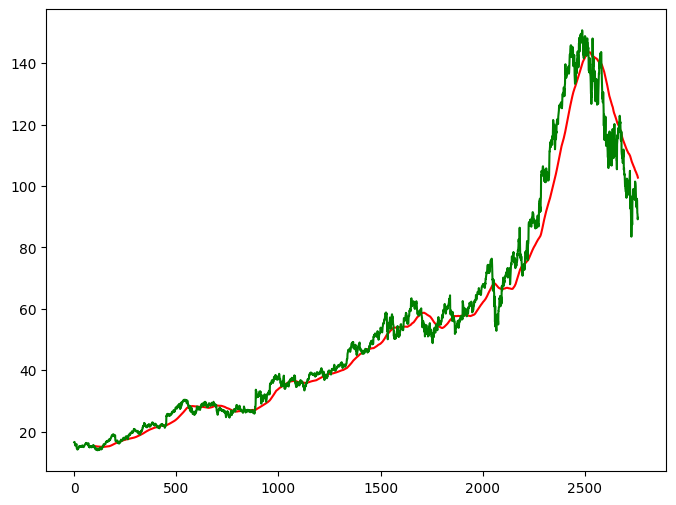

In [66]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()


In [67]:
ma_200_days=data.Close.rolling(200).mean()

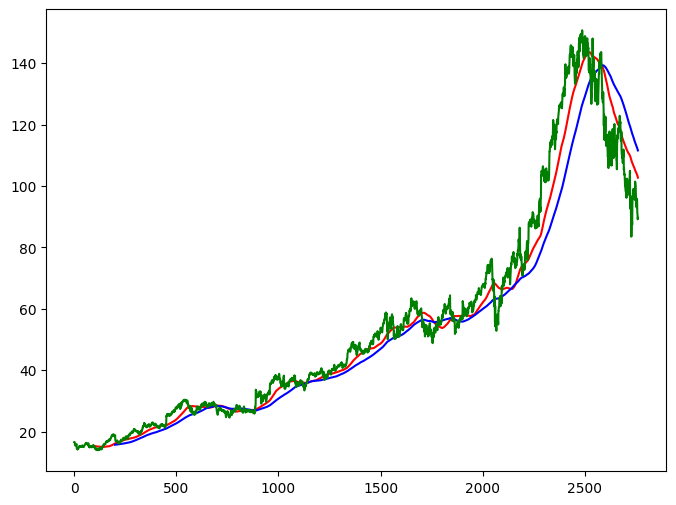

In [68]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [69]:
data.dropna(inplace=True)

In [70]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [71]:
data_train.shape[0],data_test.shape[0]

(2208, 553)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [73]:
data_train_scale=scaler.fit_transform(data_train)

In [74]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [75]:
x,y=np.array(x),np.array(y)

In [40]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [78]:
model=Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
          
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
          
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [79]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [81]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - loss: 0.0716
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0062
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0053
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0041
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0042
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0037
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - loss: 0.0040
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0039
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [83]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [84]:
past_100_days=data_train.tail(100)

In [85]:
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [86]:
data_test_scale=scaler.fit_transform(data_test)

In [88]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [89]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


In [90]:
scale=1/scaler.scale_

In [91]:
y_predict=y_predict*scale

In [92]:
y=y*scale

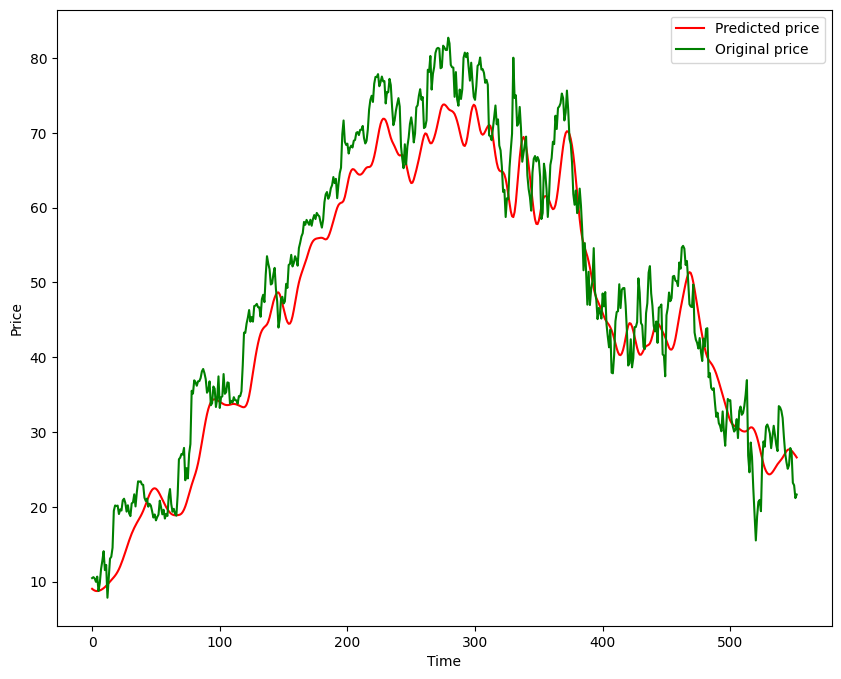

In [94]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted price')
plt.plot(y,'g',label='Original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [96]:
model.save('stockprediction.keras')